# Time Series Exploration
Description:
1. Plotted a histogram of total number of events per user for all male users who are 30+ years old.

2. For each user, compute the list of inter-event intervals in days. An inter-event interval is the period of time between an event and the one directly before it in time for the same user. Once you have a list of all the inter-event intervals across all users, plot a histogram of them below.

In [1]:
from __future__ import print_function, division
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns

# various options in pandas
pd.set_option('display.max_columns', None) #does not print every single column, would be tedious
pd.set_option('display.max_rows', 25) #how many rows, it truncates
pd.set_option('display.precision', 3) #how many digits to print

In [2]:
df_users = pd.read_csv('timeseries_users.csv')

In [3]:
df_events = pd.read_csv('timeseries_events.csv')

In [4]:
df_users

,age,gender,user_id
0,51,f,0
1,49,f,1
2,35,m,2
3,63,m,3
4,27,f,4
5,59,f,5
6,39,f,6
7,42,f,7
8,34,f,8
9,26,f,9


In [17]:
df_events

,user_id,event_date
0,0,2015-02-26 00:00:00
1,0,2015-03-10 00:00:00
2,0,2015-03-30 00:00:00
3,0,2015-02-15 00:00:00
4,0,2015-02-18 00:00:00
5,0,2015-02-22 00:00:00
6,0,2015-01-17 00:00:00
7,0,2015-02-01 00:00:00
8,0,2015-03-13 00:00:00
9,0,2015-02-14 00:00:00


In [45]:
df_events.groupby(df_events['user_id']).count().reset_index().head() #exploratory.

,user_id,event_date
0,0,148
1,1,509
2,2,126
3,3,65
4,4,247


In [39]:
df_events['user_id'].nunique() #I have 97 unique elements

97

In [124]:
df_merged = pd.merge(df_users, df_events, how='inner', on='user_id')

In [44]:
df_merged.head()

,age,gender,user_id,event_date
0,51,f,0,2015-02-26 00:00:00
1,51,f,0,2015-03-10 00:00:00
2,51,f,0,2015-03-30 00:00:00
3,51,f,0,2015-02-15 00:00:00
4,51,f,0,2015-02-18 00:00:00


In [47]:
df_merged.tail() #user ID goes up to 89, so that means some people had no matching ID between the two merged dfs

,age,gender,user_id,event_date
28275,37,m,89,2014-05-22 00:00:00
28276,37,m,89,2014-06-09 00:00:00
28277,37,m,89,2014-06-16 00:00:00
28278,37,m,89,2014-06-25 00:00:00
28279,37,m,89,2015-03-28 00:00:00


In [46]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28280 entries, 0 to 28279
Data columns (total 4 columns):
age           28280 non-null int64
gender        28280 non-null object
user_id       28280 non-null int64
event_date    28280 non-null object
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


In [42]:
#filtered by over age 30 and male
df_merged_filtered = df_merged[(df_merged['age'] > 30) & (df_merged['gender'] == 'm')]

In [67]:
df_merged_filtered.head()

,age,gender,user_id,event_date
657,35,m,2,2015-03-06 00:00:00
658,35,m,2,2015-03-19 00:00:00
659,35,m,2,2015-03-15 00:00:00
660,35,m,2,2015-02-27 00:00:00
661,35,m,2,2015-02-26 00:00:00


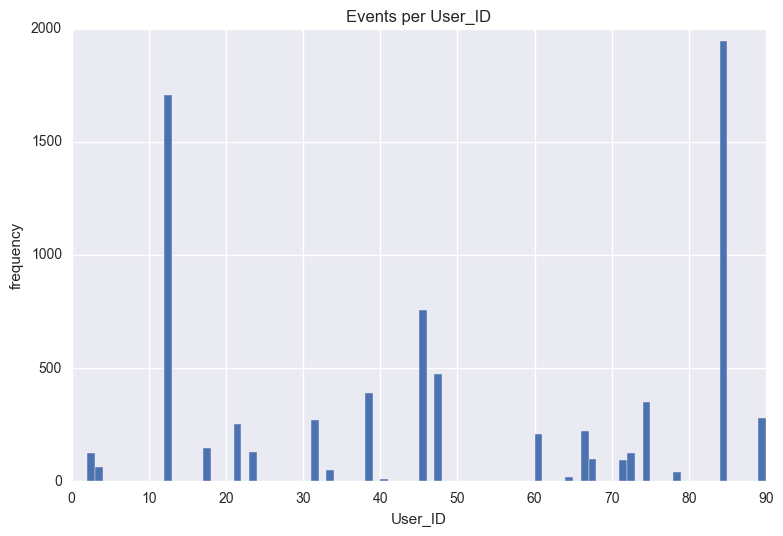

In [75]:
##### plot the histogram!
n, bins, patches = plt.hist(df_merged_filtered.user_id, bins=90, range=(0,90)) #n is y axis, bins is x axis!
plt.title('Events per User_ID')
plt.xlabel('User_ID')
plt.ylabel('frequency')
plt.tight_layout()

In [53]:
#SANITY CHECK
#groupby on the filtered and merged dataframe to get the counts of event_dates, check to see if results match the histogram.

df_final = df_merged_filtered.groupby(df_merged['user_id']).event_date.count().reset_index()
df_final.head()

,user_id,event_date
0,2,126
1,3,65
2,12,1705
3,17,147
4,21,254


In [66]:
df_final

,user_id,event_date
0,2,126
1,3,65
2,12,1705
3,17,147
4,21,254
5,23,129
6,31,271
7,33,51
8,38,391
9,40,10


In [57]:
df_final.describe()

,user_id,event_date
count,22.000,22.000
mean,47.136,352.818
std,26.874,508.878
min,2.000,10.000
25%,25.000,96.250
50%,46.000,177.500
75%,70.000,331.250
max,89.000,1947.000


In [151]:
df_merged.head()

,age,gender,user_id,event_date,inter_days
72,51,f,0,2015-01-16,1.0
6,51,f,0,2015-01-17,1.0
31,51,f,0,2015-01-18,1.0
69,51,f,0,2015-01-19,1.0
119,51,f,0,2015-01-20,1.0


In [126]:
from datetime import datetime as dt

In [127]:
df_merged['event_date'] = pd.to_datetime(df_merged.event_date, format='%Y-%m-%d', exact=False)
#exact to false to ignore the seconds!

In [87]:
df_merged.info() #make sure it's a datetime object!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28280 entries, 0 to 28279
Data columns (total 4 columns):
age           28280 non-null int64
gender        28280 non-null object
user_id       28280 non-null int64
event_date    28280 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.1+ MB


In [128]:
df_merged['event_date'] #sanity check

0       2015-02-26
1       2015-03-10
2       2015-03-30
3       2015-02-15
4       2015-02-18
5       2015-02-22
6       2015-01-17
7       2015-02-01
8       2015-03-13
9       2015-02-14
10      2015-01-17
11      2015-02-02
           ...    
28268   2014-04-18
28269   2014-04-30
28270   2014-05-09
28271   2014-08-26
28272   2014-09-10
28273   2014-10-08
28274   2015-02-05
28275   2014-05-22
28276   2014-06-09
28277   2014-06-16
28278   2014-06-25
28279   2015-03-28
Name: event_date, dtype: datetime64[ns]

In [129]:
df_merged = df_merged.sort(['user_id', 'event_date'], ascending=[1, 1])
#sort the user_id and event_date

/Users/philliptan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [130]:
df_merged

,age,gender,user_id,event_date
38,51,f,0,2015-01-15
144,51,f,0,2015-01-15
72,51,f,0,2015-01-16
129,51,f,0,2015-01-16
6,51,f,0,2015-01-17
10,51,f,0,2015-01-17
86,51,f,0,2015-01-17
31,51,f,0,2015-01-18
138,51,f,0,2015-01-18
69,51,f,0,2015-01-19


In [131]:
df_merged['inter_days'] = df_merged['event_date'] - df_merged['event_date'].shift(1)
#subtract the inter_days

In [132]:
df_merged['inter_days'] = df_merged.inter_days.dt.days

In [152]:
df_merged.head() #sanity check

,age,gender,user_id,event_date,inter_days
72,51,f,0,2015-01-16,1.0
6,51,f,0,2015-01-17,1.0
31,51,f,0,2015-01-18,1.0
69,51,f,0,2015-01-19,1.0
119,51,f,0,2015-01-20,1.0


In [134]:
df_merged = df_merged[df_merged.inter_days > 0] #ignore the negatives, some will be negative because of the shift

In [135]:
df_merged.inter_days[1:].value_counts() #count them up to plot

1.0     11324
2.0       269
3.0       114
4.0        55
5.0        25
6.0        19
7.0        13
11.0       10
9.0         8
12.0        7
16.0        6
14.0        5
        ...  
69.0        1
66.0        1
58.0        1
28.0        1
52.0        1
48.0        1
38.0        1
36.0        1
35.0        1
31.0        1
30.0        1
25.0        1
Name: inter_days, dtype: int64

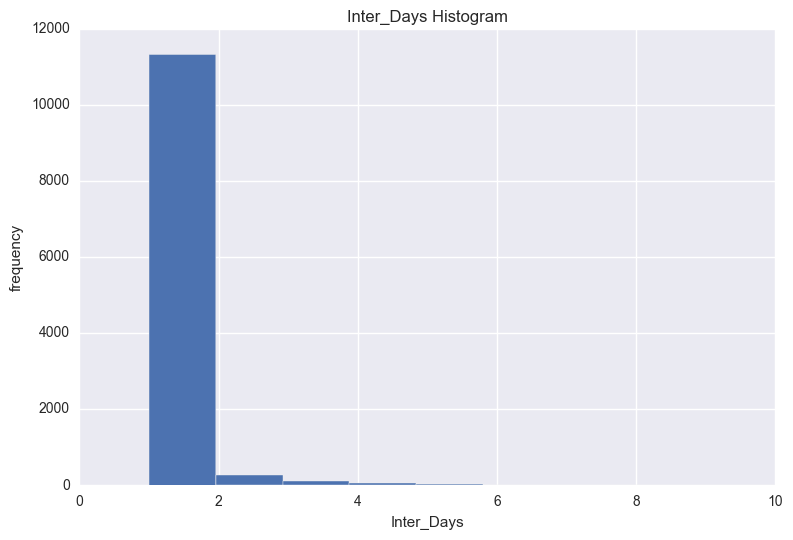

In [153]:
plt.hist(df_merged.inter_days, bins = 200, rwidth=1)
plt.xlim([0,10])
plt.title('Inter_Days Histogram')
plt.xlabel('Inter_Days')
plt.ylabel('frequency')

In [112]:
df_merged.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28280 entries, 38 to 28089
Data columns (total 6 columns):
age           28280 non-null int64
gender        28280 non-null object
user_id       28280 non-null int64
event_date    28280 non-null datetime64[ns]
dA            28279 non-null timedelta64[ns]
inter_days    28279 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1), timedelta64[ns](1)
memory usage: 1.5+ MB
